In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Gradient Descent

In [2]:
lambs = [0.0, 0.1, 0.5, 1.0, 5.0, 10.0]
dataset = 'abalone'

grad_dfs = []
for lamb in lambs:
    grad_df = pd.read_csv('./Grad/' + dataset + '_' \
        + str(lamb) + '.csv', index_col = 0)
    grad_dfs.append(grad_df)

cg_dfs = [[], [], []]
for lamb in lambs:
    for mode in [0, 1, 2]:
        cg_df = pd.read_csv('./ConjGrad/' + dataset + '_' \
            + str(mode) + '_' + str(lamb) + '.csv', index_col = 0)
        cg_dfs[mode].append(cg_df)
        
qn_dfs = [[], [], []]
for lamb in lambs:
    for mode in [0, 1, 2]:
        qn_df = pd.read_csv('./quasiNewton/' + dataset + '_' \
            + str(mode) + '_' + str(lamb) + '.csv', index_col = 0)
        qn_dfs[mode].append(qn_df)

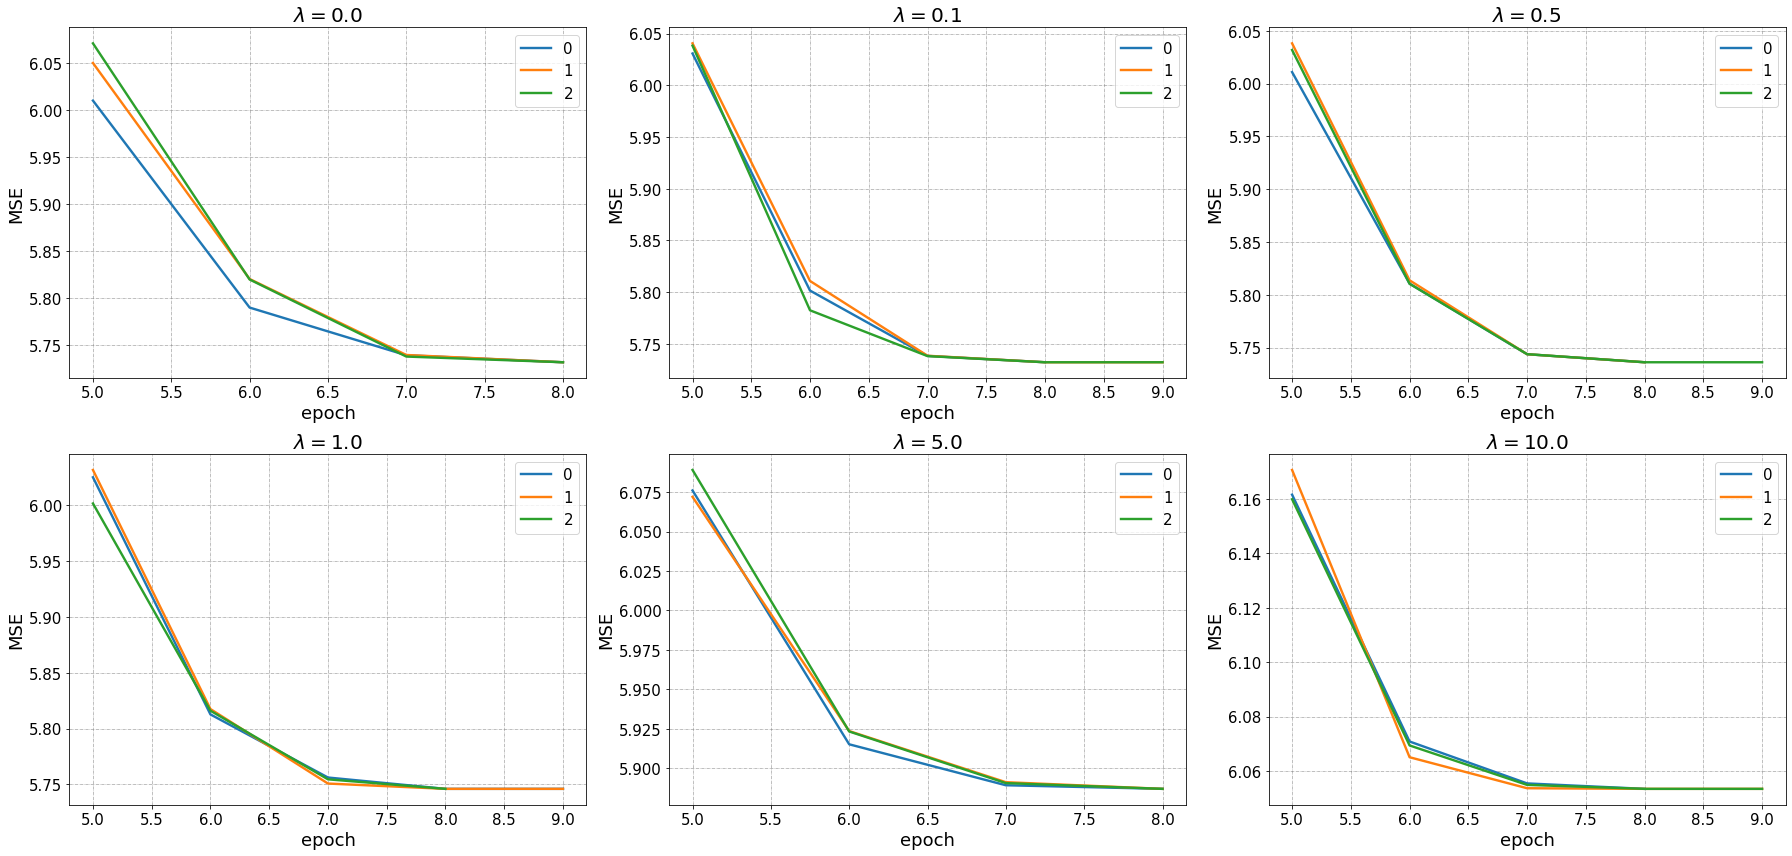

In [11]:
col = 0
fig = plt.figure(figsize=(25, 12))

lw = 2.4
title_fs = 20
legend_fs = 15
label_fs = 18
tick_fs = 15

for i in range(len(lambs)):
    plt.subplot(2, 3, (i+1))
    for mode in [0, 1, 2]:
        plt.plot(qn_dfs[mode][i].iloc[5:, col], lw = lw, label = str(mode))
    plt.xlabel('epoch', fontsize = label_fs)
    plt.ylabel('MSE', fontsize = label_fs)
    plt.tick_params(axis = 'both', labelsize = tick_fs)
    plt.title(f'$\lambda = {lambs[i]}$', fontsize = title_fs)
    plt.grid(lw = 0.5, color = 'grey', linestyle = '-.')
    plt.legend(fontsize = legend_fs)
plt.tight_layout()

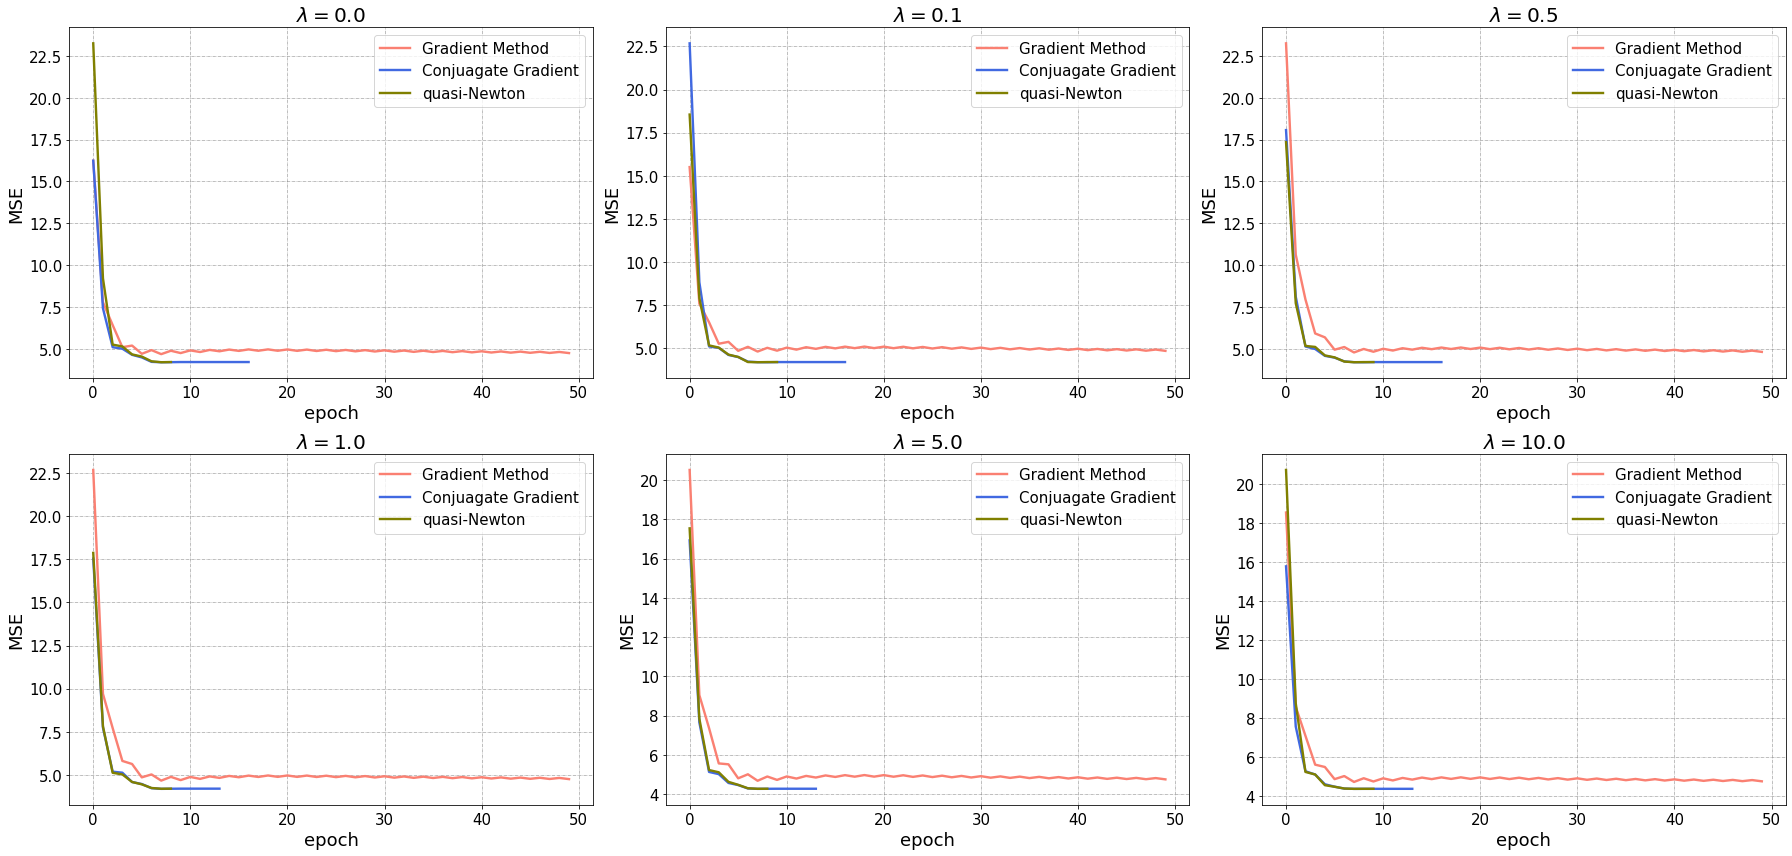

In [32]:
epoch_num = 50
col = 1
fig = plt.figure(figsize=(25, 12))

lw = 2.4
title_fs = 20
legend_fs = 15
label_fs = 18
tick_fs = 15

for i in range(len(lambs)):
    plt.subplot(2, 3, (i+1))
    plt.plot(grad_dfs[i].iloc[:epoch_num, col], color = 'salmon', lw = lw, label = 'Gradient Method')
    plt.plot(cg_dfs[0][i].iloc[:, col], color = 'royalblue', lw = lw, label = 'Conjuagate Gradient')
    plt.plot(qn_dfs[2][i].iloc[:, col], color = 'olive', lw = lw, label = 'quasi-Newton')
    plt.xlabel('epoch', fontsize = label_fs)
    plt.ylabel('MSE', fontsize = label_fs)
    plt.tick_params(axis = 'both', labelsize = tick_fs)
    plt.title(f'$\lambda = {lambs[i]}$', fontsize = title_fs)
    plt.grid(lw = 0.5, color = 'grey', linestyle = '-.')
    plt.legend(fontsize = legend_fs)
plt.tight_layout()